In [2]:
import matplotlib
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import numpy as np
import math
from itertools import chain 
from scipy.stats import expon

In [18]:
# Define parameters
p = 5*pow(10,-6)
N0 = 400
g = 20 
q = pow(10,3)
surv = np.zeros(q)

for Q in tqdm( range(q) ):
    mut1 = 0
    mut2 = 0
    non = N0

    for j in range(g): 

        tmp1 = np.random.poisson(2*p*non) #method like in the class
        tmp2 = np.random.poisson(2*p*mut1)
        
        mut1 = 2*mut1 + tmp1 - tmp2
        mut2 = 2*mut2 + tmp2
        non = N0*pow(2,j+1) - mut1 - mut2
    
    surv[Q] = mut2

In [25]:
x=[]
ch = 30
for Q in range(q):
    if surv[Q]>ch:
        x.append(ch)
    else:
        x.append(surv[Q])

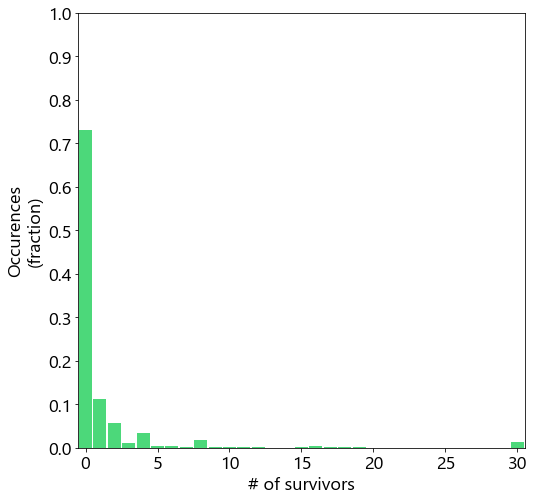

In [32]:
font = {'family' : 'Segoe UI',
        'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)

plt.figure (figsize=(8,8))
plt.hist(x,  bins=ch+1, rwidth = 0.9, density='True', align='mid', range = (-0.5,ch+0.5), color = '#4cd87a')

plt.xlabel('# of survivors') 
plt.ylabel('Occurences\n(fraction)')

plt.ylim(ymin=0, ymax = 1)
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xlim(xmin=-0.5, xmax = ch+0.5)
plt.show()